In [18]:
#Importing Modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from perceptron import Perceptron
import matplotlib.pyplot as plt

In [19]:
#Importing Dataset
data = pd.read_csv('./Iris.csv')

In [20]:
#Label-Encoding
label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [21]:
#Splitting Train-Test
x=data.drop(columns=['Species'])
y=data['Species']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1234)

In [22]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [23]:
# Loading-Model 
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(xtrain_scaled, ytrain)
# Make predictions on the test set
y_pred = p.predict(xtest_scaled)

In [24]:
#Check Accuracy
np.sum(ytest == y_pred) / len(ytest)

0.7333333333333333

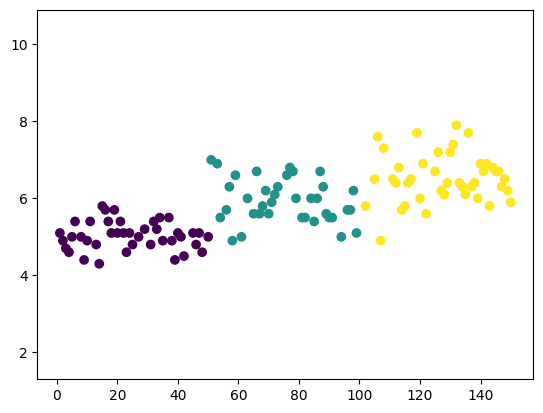

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(xtrain.values[:, 0], xtrain.values[:, 1], marker="o", c=ytrain)

x0_1 = np.amin(xtrain.values[:, 0])
x0_2 = np.amax(xtrain.values[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(xtrain.values[:, 1])
ymax = np.amax(xtrain.values[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()
